## CoViD-19 

### Analisi a livello regionale

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib

In [2]:
# Dictionary of situation per each day
# import the csv and append to the dictionary

current_day=19
dataframes={}

# February
for x in range(24, 30):
    globals()['df_feb_%s' % x] = pd.read_csv("data/dati-regioni/dpc-covid19-ita-regioni-202002"+str(x)+".csv")
    dataframes['Feb_%s' %x]=globals()['df_feb_%s' % x] 
    
# March
for x in range(1, 10):
    globals()['df_mar_%s' % x] = pd.read_csv("data/dati-regioni/dpc-covid19-ita-regioni-2020030"+str(x)+".csv")
    dataframes['Mar_%s' %x]=globals()['df_mar_%s' % x] 
for x in range(10, current_day+1):
    globals()['df_mar_%s' % x] = pd.read_csv("data/dati-regioni/dpc-covid19-ita-regioni-202003"+str(x)+".csv")
    dataframes['Mar_%s' %x]=globals()['df_mar_%s' % x] 

In [3]:
# Dizionario abitanti per regione

lista=[0]*21
abitanti = dict(zip(dataframes['Mar_3'].columns, lista))

abitanti['Abruzzo']=1311580
abitanti['Basilicata']=562869
abitanti['P.A. Bolzano']=533050
abitanti['Calabria']=1947131
abitanti['Campania']=5801692
abitanti['Emilia Romagna']=4459477
abitanti['Friuli Venezia Giulia']=1215220
abitanti['Lazio']=5898124
abitanti['Liguria']=1550640
abitanti['Lombardia']=10018806
abitanti['Marche']=1525271
abitanti['Molise']=305617
abitanti['Piemonte']=4356406
abitanti['Puglia']=4029053
abitanti['Sardegna']=1639591
abitanti['Sicilia']=4999891
abitanti['Toscana']=3729641
abitanti['P.A. Trento']=541380 
abitanti['Umbria']=882015
abitanti['Valle d\'Aosta']=125666
abitanti['Veneto']=4905854

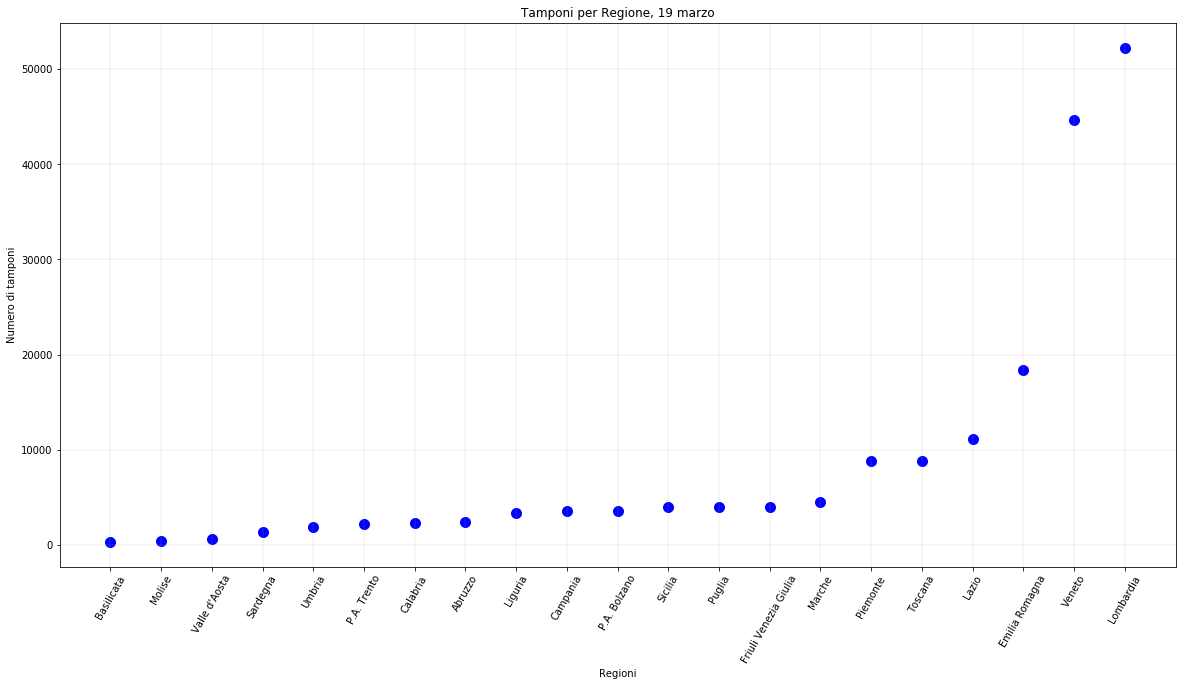

In [4]:
# Grafico tamponi per regione

plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
plt.xlabel('Regioni')
plt.grid(linewidth=0.2)
plt.ylabel('Numero di tamponi')
plt.title('Tamponi per Regione, %s marzo' % current_day)
_=plt.scatter(df_mar_19.sort_values(by='tamponi').denominazione_regione, df_mar_19.sort_values(by='tamponi').tamponi, color="blue",s=100, marker="o")

<BarContainer object of 21 artists>

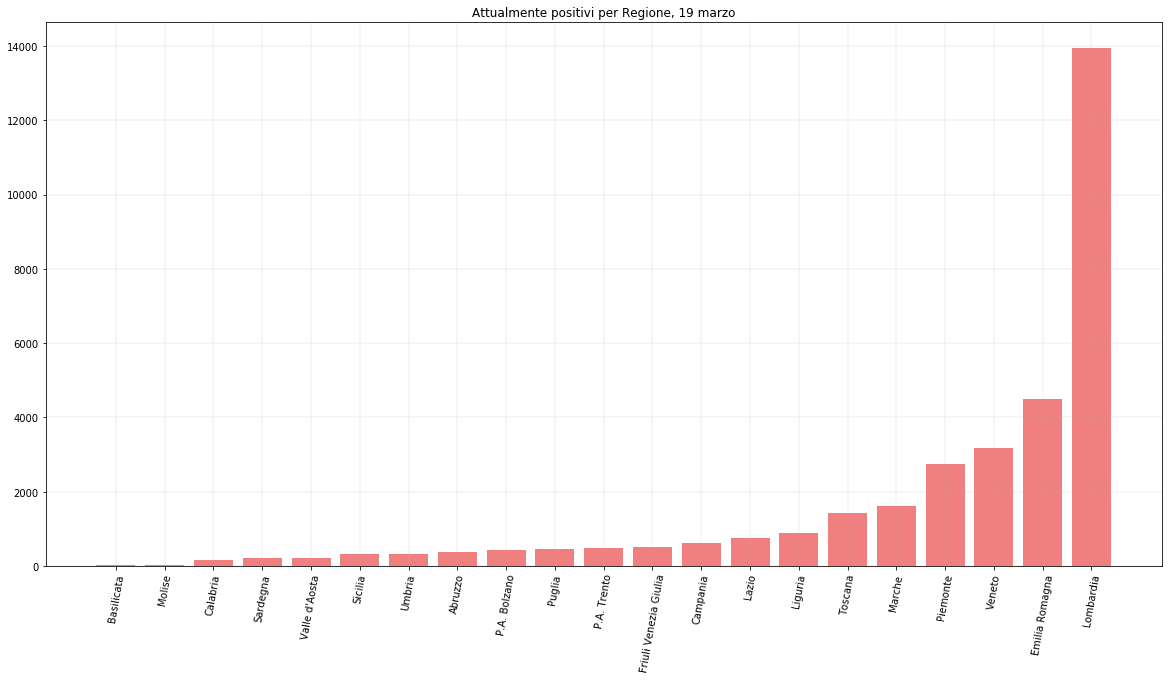

In [5]:
# Grafico positivi per regione
plt.figure(figsize=(20,10))
plt.xticks(rotation=80)
plt.grid(linewidth=0.2)
#plt.xlabel('Regioni')
#plt.ylabel('Numero di attualmente positivi')
plt.title('Attualmente positivi per Regione, %s marzo' %current_day)

plt.bar(df_mar_19.sort_values(by='totale_attualmente_positivi').denominazione_regione, df_mar_19.sort_values(by='totale_attualmente_positivi').totale_attualmente_positivi, color="lightcoral")

In [6]:
# Creazione dataframe che mostra andamento giornaliero della statistica desiderata per ogni regione

def reg_trend(stat_type):
    lista_appoggio=[]
    for el in dataframes:
        lista_appoggio.append(dataframes[el][stat_type])
    df=pd.DataFrame(lista_appoggio)

    df.index=[x for x in dataframes]
    df.rename(inplace=True, columns=dataframes['Feb_24'].denominazione_regione, index=pd.Series([x for x in dataframes]))
    df=pd.DataFrame(df)
    return df

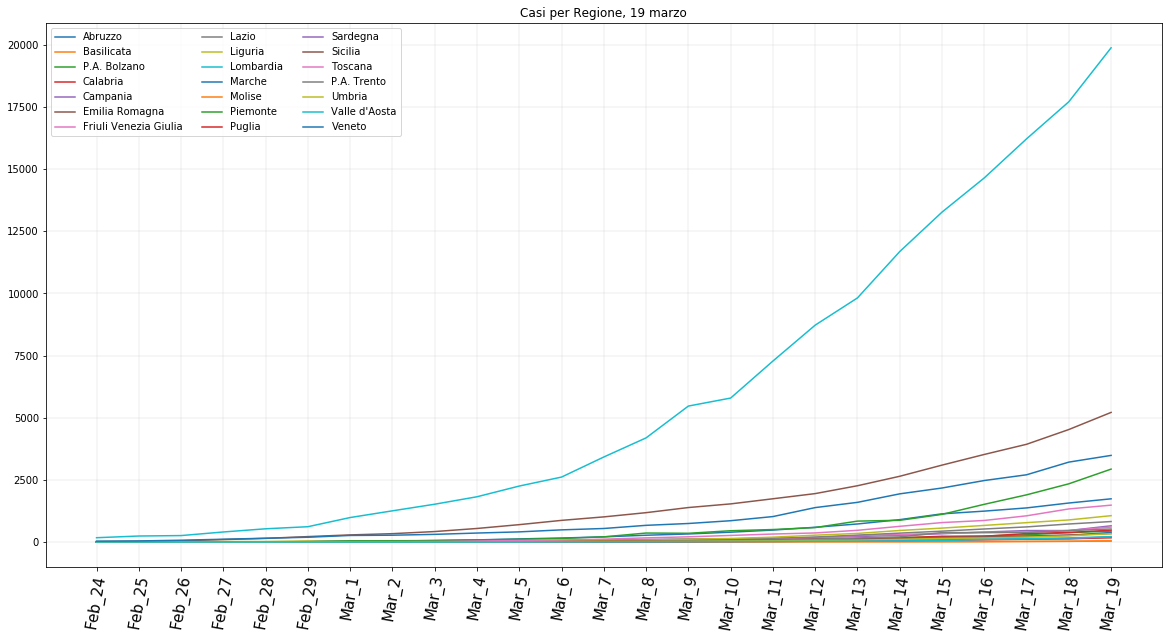

In [27]:
stat_type='totale_casi'
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation=80, size=15)
#plt.ylim(0,4000)
plt.grid(linewidth=0.2)
plt.title('Casi per Regione, %s marzo' %current_day)
_=plt.plot(reg_trend(stat_type))
_=plt.legend(reg_trend(stat_type).columns.values, loc='upper left',ncol=3)
plt.show()
fig.savefig('casi.png')

### Analisi a livello nazionale

In [8]:
# Queste funzioni mostrano l'andamento di una determinata statistica a livello di regione o nazionale con il
# passare dei giorni

# Nazionale
def overall_trend(stat_type):
    lista=[]
    for day in dataframes:
        lista.append(sum(dataframes[day][stat_type]))
    return lista

# Regionale
def overall_reg_trend(stat_type, region):
    lista=[]
    for day in dataframes:
        lista.append(int(dataframes[day][dataframes[day].denominazione_regione==region][stat_type].values))
    return lista

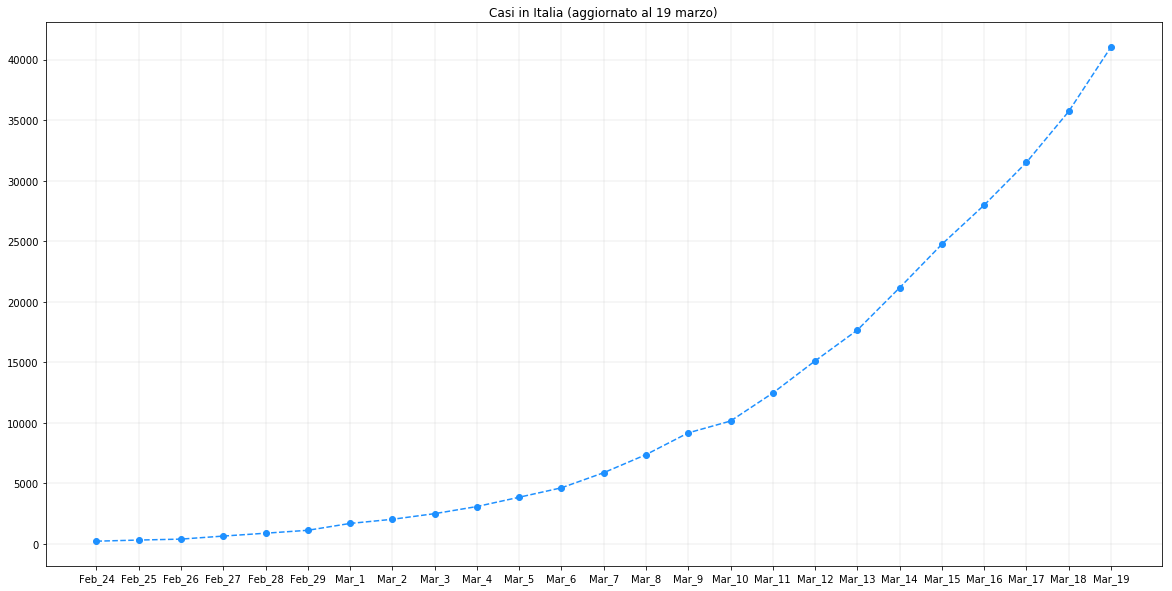

In [26]:
# Andamento nazionale della statistica desiderata

def print_overall_trend(stat_type, _color, scale='linear', region="Italy"):
    fig=plt.figure(figsize=(20,10))
    plt.grid(linewidth=0.2)
    plt.yscale(scale)
    plt.title('Casi in Italia (aggiornato al %d marzo)' %current_day)
    if region=="Italy":
        _=plt.plot(pd.DataFrame(overall_trend(stat_type)).rename(index=pd.Series([x for x in dataframes])), 'go--',color=_color)
        fig.savefig('fig.png')
    else:
        _=plt.plot(pd.DataFrame(overall_reg_trend(stat_type, region)).rename(index=pd.Series([x for x in dataframes])), 'go--',color=_color)
        fig.savefig('fig.png')
        
print_overall_trend('totale_casi', 'dodgerblue', scale='linear')

In [11]:
def delta_var(stat_type, perc="yes"):
    delta_perc=[]
    for i in range(len(list(overall_trend(stat_type)))):
        if i==0:
            pass
        else:
            if perc=="yes":
                delta=(list(overall_trend(stat_type))[i]-list(overall_trend(stat_type))[i-1])/list(overall_trend(stat_type))[i-1]
            else:
                delta=list(overall_trend(stat_type))[i]-list(overall_trend(stat_type))[i-1]
            delta_perc.append(delta)
    return delta_perc

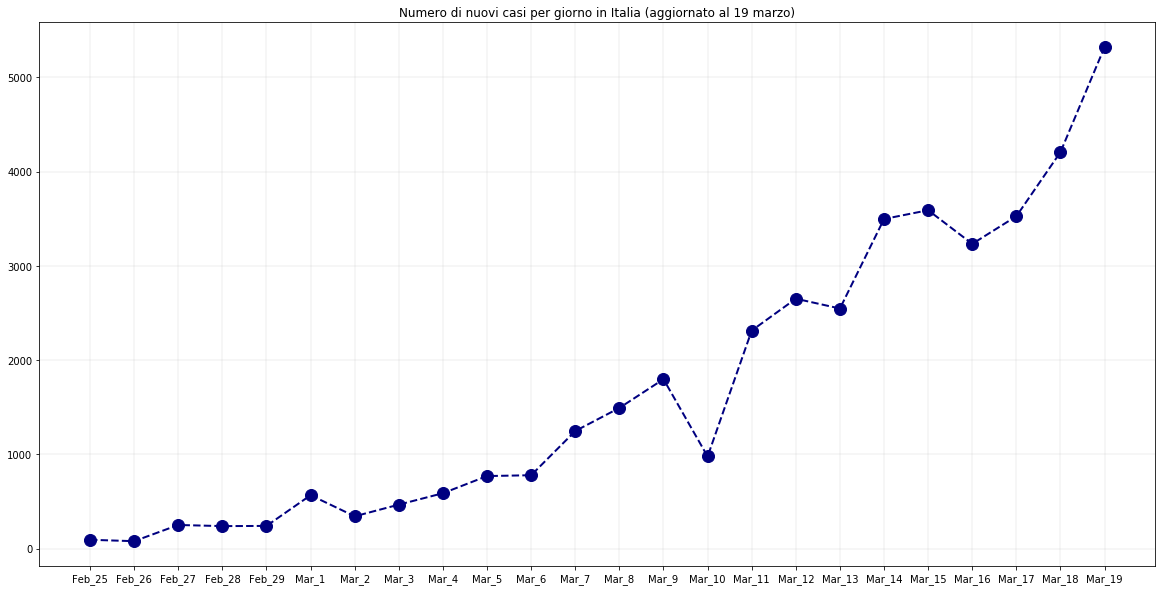

In [25]:
fig=plt.figure(figsize=(20,10))
plt.grid(linewidth=0.2)
plt.yscale('linear')
plt.title('Numero di nuovi casi per giorno in Italia (aggiornato al %d marzo)' %current_day)
index_=pd.Series([x for x in dataframes][1:])
_=plt.plot(pd.DataFrame(delta_var('totale_casi','no')).rename(index=index_),'go--', linewidth=2, markersize=12, color="navy")
fig.savefig('new.png')

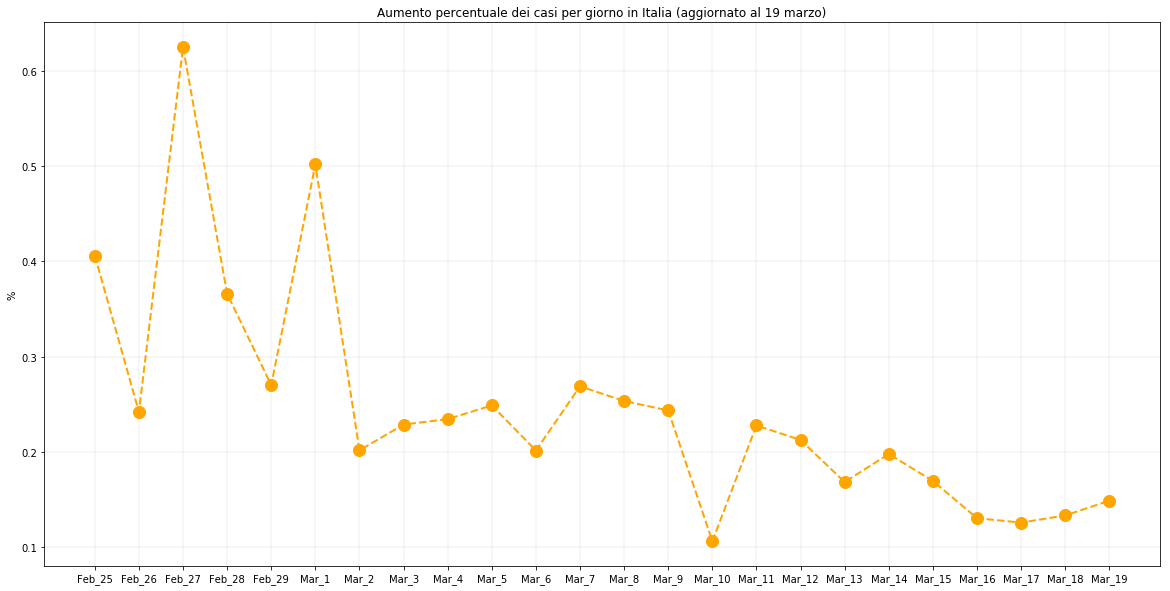

In [13]:
plt.figure(figsize=(20,10))
plt.grid(linewidth=0.2)
plt.yscale('linear')
plt.ylabel('%')
plt.title('Aumento percentuale dei casi per giorno in Italia (aggiornato al %d marzo)' %current_day)
index_=pd.Series([x for x in dataframes][1:])
_=plt.plot(pd.DataFrame(delta_var('totale_casi',)).rename(index=index_),'go--', linewidth=2, markersize=12, color="orange")

In [14]:
dataframes['Mar_19']

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-03-19 17:00:00,ITA,13,Abruzzo,42.351222,13.398438,181,47,228,138,366,117,8,11,385,2409
1,2020-03-19 17:00:00,ITA,17,Basilicata,40.639471,15.805148,8,5,13,24,37,10,0,0,37,353
2,2020-03-19 17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,87,18,105,316,421,55,1,14,436,3568
3,2020-03-19 17:00:00,ITA,18,Calabria,38.905976,16.594402,60,13,73,91,164,38,2,3,169,2342
4,2020-03-19 17:00:00,ITA,15,Campania,40.839566,14.250850,213,36,249,356,605,182,30,17,652,3544
5,2020-03-19 17:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,1900,260,2160,2346,4506,591,177,531,5214,18344
6,2020-03-19 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,134,29,163,359,522,106,41,36,599,4052
7,2020-03-19 17:00:00,ITA,12,Lazio,41.892770,12.483667,426,45,471,270,741,91,44,38,823,11145
8,2020-03-19 17:00:00,ITA,7,Liguria,44.411493,8.932699,491,112,603,280,883,139,85,91,1059,3348
9,2020-03-19 17:00:00,ITA,3,Lombardia,45.466794,9.190347,7387,1006,8393,5545,13938,1672,3778,2168,19884,52244


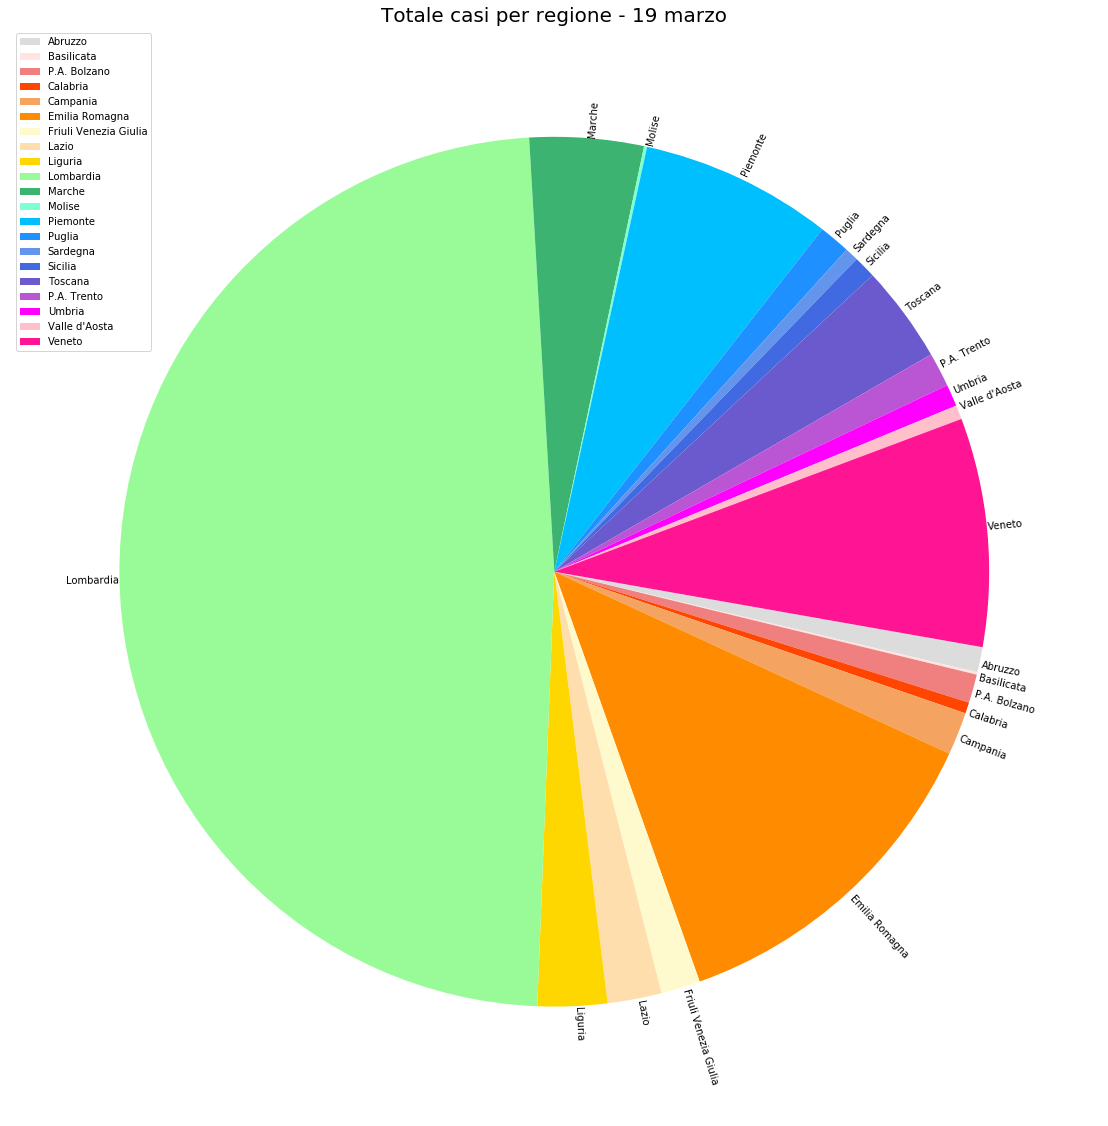

In [23]:

color_list = ['gainsboro','mistyrose','lightcoral','orangered','sandybrown','darkorange','lemonchiffon','navajowhite','gold',
             'palegreen', 'mediumseagreen','aquamarine','deepskyblue','dodgerblue','cornflowerblue','royalblue','slateblue',
             'mediumorchid','magenta', 'pink','deeppink']
fig=plt.figure(figsize=(30,20))
plt.title("Totale casi per regione - %s marzo" % current_day, fontsize=20)
_=plt.pie(dataframes['Mar_'+str(current_day)].totale_casi, labels=dataframes['Mar_'+str(current_day)].denominazione_regione,
          colors = color_list, labeldistance=1,rotatelabels=2, counterclock=False, startangle=-10)
plt.legend(dataframes['Mar_'+str(current_day)].denominazione_regione, loc=2)
plt.show()
fig.savefig('plot.png')

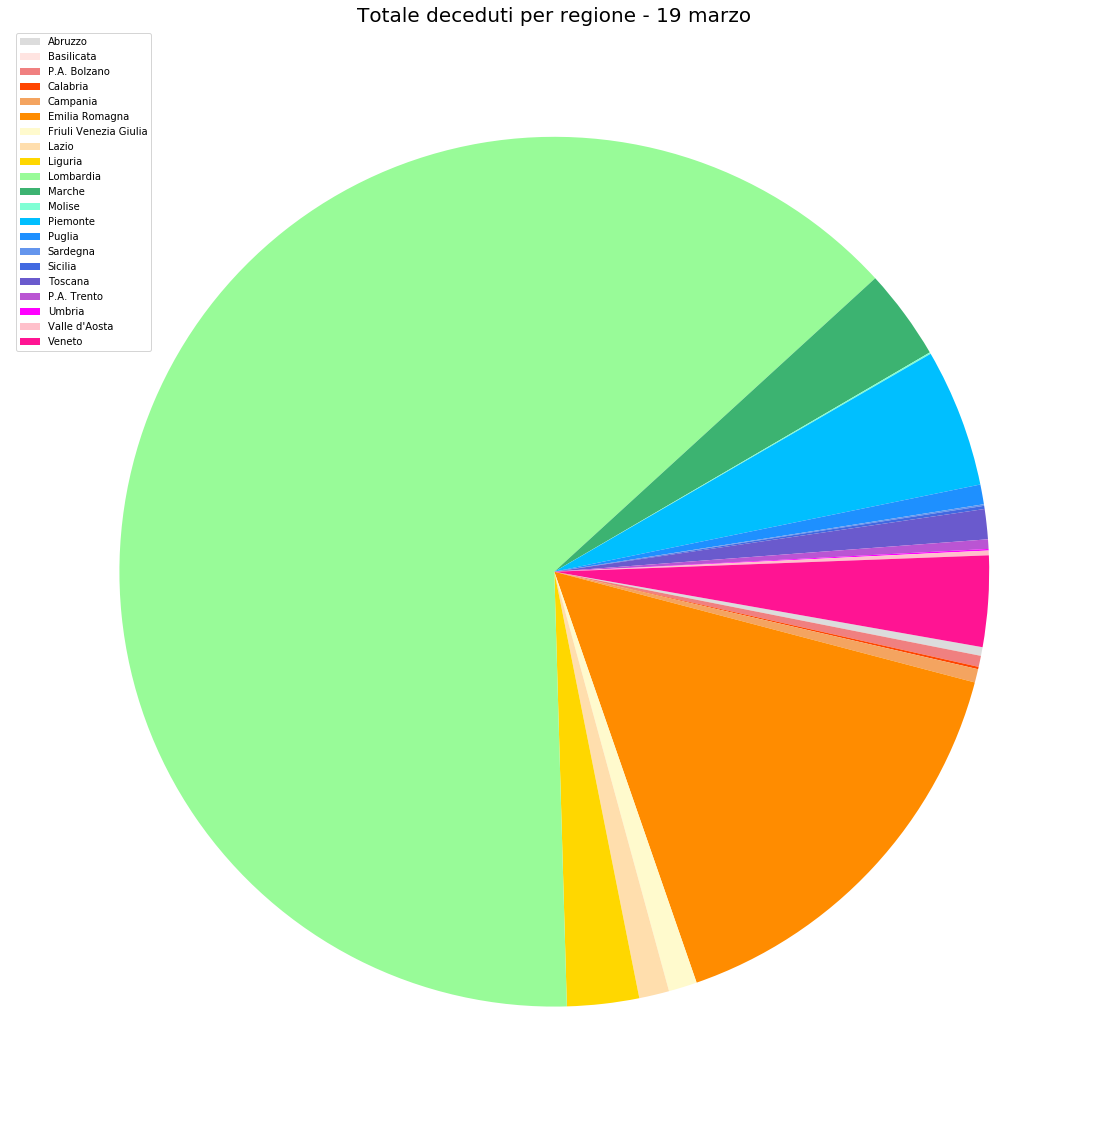

In [24]:
fig=plt.figure(figsize=(30,20))
plt.title("Totale deceduti per regione - %s marzo" % current_day, fontsize=20)
_=plt.pie(dataframes['Mar_'+str(current_day)].deceduti,
          colors = color_list, counterclock=False, startangle=-10)
plt.legend(dataframes['Mar_'+str(current_day)].denominazione_regione, loc=2)
plt.show()
fig.savefig('pie2.png')

In [30]:
overall_trend('totale_casi')

[229,
 322,
 400,
 650,
 888,
 1128,
 1694,
 2036,
 2502,
 3089,
 3858,
 4636,
 5883,
 7375,
 9172,
 10149,
 12462,
 15113,
 17660,
 21157,
 24747,
 27980,
 31506,
 35713,
 41035]